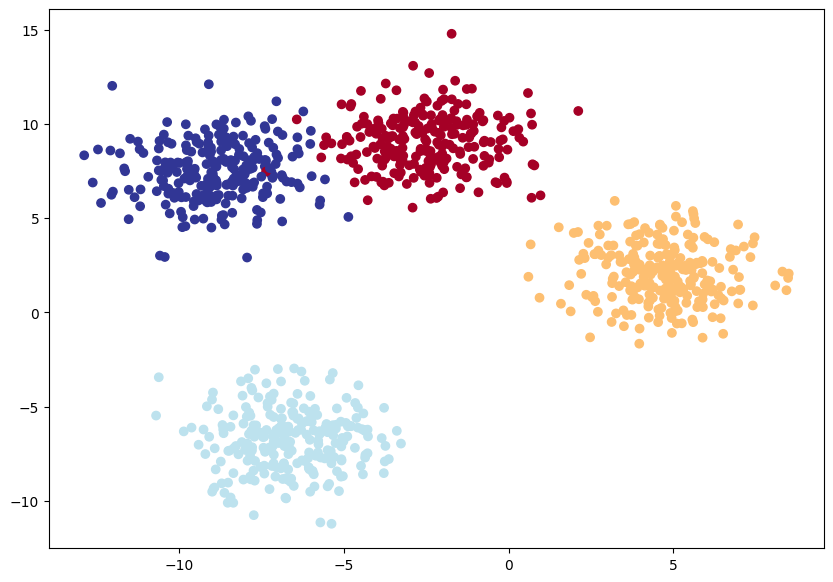

In [63]:
# Toy multi class data set
import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs #Generate isotropic Gaussian blobs for clustering.
from sklearn.model_selection import train_test_split

# Set hyperparameters
NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

# Create multi-class data
X_blob, y_blob = make_blobs(n_samples=1000,
                            n_features=NUM_FEATURES,
                            centers=NUM_CLASSES,
                            cluster_std=1.5,
                            random_state=RANDOM_SEED)

# Turn data into tensors
X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)

# Split into training and testing sets
X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob,
                                                                        y_blob,
                                                                        test_size=0.2,
                                                                        random_state=RANDOM_SEED)
# Plotting
plt.figure(figsize=(10,7))
plt.scatter(X_blob[:,0], X_blob[:,1], c=y_blob, cmap=plt.cm.RdYlBu);

In [64]:
# Building a multi-class classification model in Pytorch

device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [65]:
from torch import nn

In [66]:
class BlobModel(nn.Module):
    def __init__(self, input_features, output_features, hidden_units=8):
        """Initializes multi class classification model
        Args:
            input_features(int): number of input features to the model
            output_features(int): number of outputs features/classes
            hidden_units(int): number of hidden units between layers
        Returns:
        Example:
        """
        super().__init__()
        self.linear_layer_stack = nn.Sequential(
        nn.Linear(in_features=input_features, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=output_features)
        )
    
    def forward(self, x):
        return self.linear_layer_stack(x)
        

In [67]:
X_blob_train.shape

torch.Size([800, 2])

In [68]:
torch.unique(y_blob_train)

tensor([0, 1, 2, 3])

In [69]:
model_4 = BlobModel(input_features=2, output_features=4, hidden_units=8).to(device)
model_4

BlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=8, bias=True)
    (3): ReLU()
    (4): Linear(in_features=8, out_features=4, bias=True)
  )
)

In [70]:
next(model_4.parameters())

Parameter containing:
tensor([[ 0.5406,  0.5869],
        [-0.1657,  0.6496],
        [-0.1549,  0.1427],
        [-0.3443,  0.4153],
        [ 0.6233, -0.5188],
        [ 0.6146,  0.1323],
        [ 0.5224,  0.0958],
        [ 0.3410, -0.0998]], device='cuda:0', requires_grad=True)

In [71]:
# Loss function and optimizer

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params = model_4.parameters(),
                            lr = 0.1)

In [72]:
X_blob_test = X_blob_test.to(device)
X_blob_train = X_blob_train.to(device)
y_blob_test = y_blob_test.to(device)
y_blob_train = y_blob_train.to(device)

In [73]:
model_4.eval()
with torch.inference_mode():
    y_logits = model_4(X_blob_test)
    
y_logits[:10]

tensor([[-0.7645, -0.7411, -1.5780, -1.1379],
        [-0.0972, -0.9429, -0.5961, -0.1371],
        [ 0.2528, -0.2379,  0.1882, -0.0066],
        [-0.4133, -0.5202, -0.9304, -0.6963],
        [-0.3119, -1.3735, -1.1992, -0.3835],
        [-0.1498, -1.0617, -0.7106, -0.1645],
        [ 0.1540, -0.2886,  0.1522, -0.0108],
        [-0.2156, -1.1796, -0.9302, -0.2746],
        [ 0.2444, -0.2469,  0.1652,  0.0061],
        [-0.2332, -1.2125, -0.9855, -0.3006]], device='cuda:0')

In [74]:
# Converting model output logits to prediction probabilities
y_pred_probs = torch.softmax(y_logits, dim=1)
# print(y_logits[:5])
# print(y_pred_probs[:5])

# Coverting prediction probabilities to labels
y_preds = torch.argmax(y_pred_probs, dim=1)
y_preds

tensor([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 3, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 1, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 3, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 1, 0, 1], device='cuda:0')

In [75]:
torch.sum(y_pred_probs[0])

tensor(1., device='cuda:0')

In [76]:
y_preds.shape, y_blob_test.shape

(torch.Size([200]), torch.Size([200]))

In [77]:
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct / len(y_pred))*100
    return acc

In [78]:
y_blob[:10]

tensor([3, 2, 2, 1, 1, 2, 1, 2, 2, 1])

In [79]:
# Training and testing loops

torch.manual_seed(42)
torch.cuda.manual_seed(42)

X_blob_test = X_blob_test.to(device)
X_blob_train = X_blob_train.to(device)
y_blob_test = y_blob_test.to(device)
y_blob_train = y_blob_train.to(device)

epochs = 100

for epoch in range(epochs):
    model_4.train()
    # Forward pass
    y_logits = model_4(X_blob_train)
    y_pred_probs = torch.softmax(y_logits, dim=1)
    y_preds = torch.argmax(y_pred_probs, dim=1)
    # Loss and accuracy calculation
    loss = loss_fn(y_logits, y_blob_train)
    acc = accuracy_fn(y_true=y_blob_train, y_pred=y_preds)
    # Optimizer zero gradient
    optimizer.zero_grad()
    # Backpropagation
    loss.backward()
    # Optimizer step
    optimizer.step()
    
    # Testing
    model_4.eval()
    with torch.inference_mode():
        y_test_logits = model_4(X_blob_test)
        y_test_pred_probs = torch.softmax(y_test_logits, dim=1)
        y_test_preds = torch.argmax(y_test_pred_probs, dim=1)
    
    test_loss = loss_fn(y_test_logits, y_blob_test)
    test_acc = accuracy_fn(y_true=y_blob_test, y_pred=y_test_preds)
    
    if epoch%10 == 0:
        print(f"Epoch: {epoch} | Training Loss: {loss:.4f} | Training Accuracy: {acc:.2f}% | Test Loss: {test_loss:.4f} | Test Accuracy: {test_acc:.2f}% ")

Epoch: 0 | Training Loss: 1.1588 | Training Accuracy: 40.25% | Test Loss: 1.0756 | Test Accuracy: 48.50% 
Epoch: 10 | Training Loss: 0.6448 | Training Accuracy: 96.75% | Test Loss: 0.6607 | Test Accuracy: 97.50% 
Epoch: 20 | Training Loss: 0.4253 | Training Accuracy: 98.50% | Test Loss: 0.4308 | Test Accuracy: 100.00% 
Epoch: 30 | Training Loss: 0.2529 | Training Accuracy: 99.12% | Test Loss: 0.2451 | Test Accuracy: 99.50% 
Epoch: 40 | Training Loss: 0.1123 | Training Accuracy: 99.25% | Test Loss: 0.1022 | Test Accuracy: 99.50% 
Epoch: 50 | Training Loss: 0.0663 | Training Accuracy: 99.25% | Test Loss: 0.0585 | Test Accuracy: 99.50% 
Epoch: 60 | Training Loss: 0.0507 | Training Accuracy: 99.25% | Test Loss: 0.0429 | Test Accuracy: 99.50% 
Epoch: 70 | Training Loss: 0.0430 | Training Accuracy: 99.25% | Test Loss: 0.0349 | Test Accuracy: 99.50% 
Epoch: 80 | Training Loss: 0.0384 | Training Accuracy: 99.25% | Test Loss: 0.0299 | Test Accuracy: 99.50% 
Epoch: 90 | Training Loss: 0.0352 | T

In [80]:
# Below code downloads a file from remote repo of the tutorial to create the decision boundary
import requests
from pathlib import Path

if Path("helper_functions.py").is_file():
    print("helper_functions.py already exits")
else:
    print("Downloading helper_functions.py")
    request = requests.get('https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py')
    with open("helper_functions.py", "wb") as f:
        f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

helper_functions.py already exits


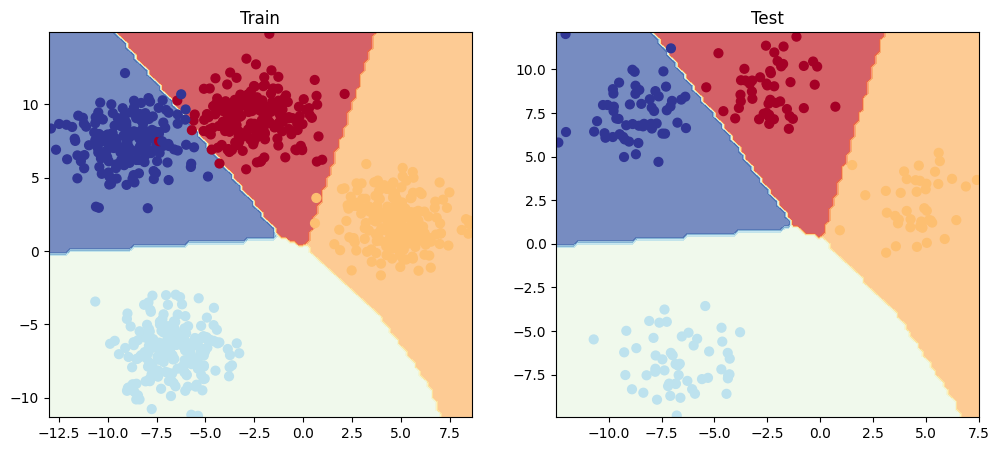

In [81]:
# Plot decision boundary of the model
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_4, X_blob_train, y_blob_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_4, X_blob_test, y_blob_test)

In [83]:
import torchmetrics

In [84]:
from torchmetrics import Accuracy

In [91]:
torchmetric_accuracy = Accuracy(task="multiclass", num_classes=NUM_CLASSES).to(device)
torchmetric_accuracy(y_test_preds, y_blob_test)

tensor(0.9950, device='cuda:0')